# 패키지 불러오기

In [2]:
import konlpy
from konlpy.tag import Hannanum, Kkma, Komoran

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

import re
import sys
import os
import time
import random
import pandas as pd
import numpy as np

C:\Users\Yooyeon\Anaconda35\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# train 데이터 및 test 데이터 불러오기 

In [2]:
train_data = pd.read_csv('data/english_train.csv',encoding='utf-8', engine='python', index_col=0)
test_data = pd.read_csv('data/english_test.csv', encoding='utf-8', engine='python',index_col=0)

### train 데이터 및 test 데이터 갯수 확인

In [4]:
len(train_data), len(test_data)

(1800, 200)

### 데이터 혼합하기

In [5]:
whole_data = pd.concat([train_data, test_data]).reset_index(drop=True)

In [6]:
whole_data

,reviews,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
5,"on june 30 , 1960 , a self-taught , idealistic...",1
6,"apparently , director tony kaye had a major ba...",1
7,one of my colleagues was surprised when i told...,1
8,"after bloody clashes and independence won , lu...",1
9,the american action film has been slowly drown...,1


# 데이터 기호 및 문법 전처리 

In [7]:
docs_tr = [re.sub(r"\%\$ ?\([^)]+\)-", "", x) for x in whole_data.reviews.values.tolist()]
docs_tr = [re.sub("\'", " ", x) for x in docs_tr]
docs_tr = [re.sub('\S*@\S*\s?', '', x) for x in docs_tr]
docs_tr = [re.sub('\s+', ' ', x) for x in docs_tr]
docs_tr = [re.sub('[^\w\s]','',x) for x in docs_tr]

# 기호 및 문법 전처리 된 데이터 확인

In [8]:
whole_data.reviews = docs_tr

In [9]:
whole_data

,reviews,sentiment
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you ve got mail works alot better than it dese...,1
3,jaws is a rare film that grabs your attenti...,1
4,moviemaking is a lot like being the general ma...,1
5,on june 30 1960 a selftaught idealistic ye...,1
6,apparently director tony kaye had a major bat...,1
7,one of my colleagues was surprised when i told...,1
8,after bloody clashes and independence won lum...,1
9,the american action film has been slowly drown...,1


# 토큰화

In [10]:
docs_tr = [word_tokenize(review) for review in whole_data.reviews.values.tolist()]

# 토큰화 확인

In [10]:
docs_tr[0]

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'they',
 're',
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kids',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'there',
 's',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starters',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 '80s',
 'with',
 'a',
 '12part',
 'series',
 'called',
 'the',
 'watchmen',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',

# lemmatization 시행

In [11]:
lemmatizer = WordNetLemmatizer()
lemm_docs_tr = [[lemmatizer.lemmatize(word) for word in doc] for doc in docs_tr]

# lemmatization 확인

In [12]:
lemm_docs_tr[0]

['film',
 'adapted',
 'from',
 'comic',
 'book',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'they',
 're',
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kid',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'there',
 's',
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starter',
 'it',
 'wa',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 '80',
 'with',
 'a',
 '12part',
 'series',
 'called',
 'the',
 'watchman',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',
 'you

# stop word 제거 시행

In [12]:
stop_words = stopwords.words('english')
filtered_docs = [[w for w in doc if not w in stop_words] for doc in lemm_docs_tr]

# stop word 제거 확인

In [14]:
filtered_docs[0]

['film',
 'adapted',
 'comic',
 'book',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kid',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starter',
 'wa',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 '80',
 '12part',
 'series',
 'called',
 'watchman',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 '500',
 'page',
 'long',
 'includes',
 'nearly',
 '30',
 'consist',
 'nothing',
 'footnote',
 'word',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'director',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brot

In [13]:
whole_data.reviews =filtered_docs

# 전처리 확인

In [16]:
whole_data

,reviews,sentiment
0,"[film, adapted, comic, book, plenty, success, ...",1
1,"[every, movie, come, along, suspect, studio, e...",1
2,"[got, mail, work, alot, better, deserves, orde...",1
3,"[jaw, rare, film, grab, attention, show, singl...",1
4,"[moviemaking, lot, like, general, manager, nfl...",1
5,"[june, 30, 1960, selftaught, idealistic, yet, ...",1
6,"[apparently, director, tony, kaye, major, batt...",1
7,"[one, colleague, wa, surprised, told, wa, will...",1
8,"[bloody, clash, independence, lumumba, refused...",1
9,"[american, action, film, ha, slowly, drowning,...",1


# 데이터 내 모든 토큰 결합

In [14]:
tokens = [tok for sublist in filtered_docs for tok in sublist]

# nltk 객체 생성

In [15]:
text=nltk.Text(tokens)

# 중복을 제외한 토큰의 수 

In [16]:
print(len(set(text.tokens)))

41166


# 전체 문서에서 가장 많이 나온 토큰 10개 확인

In [17]:
print(text.vocab().most_common(10))

[('film', 10963), ('movie', 6854), ('one', 5756), ('wa', 4935), ('ha', 4747), ('character', 3853), ('like', 3651), ('time', 2849), ('get', 2785), ('scene', 2638)]


# 전체 문서에서 가장 많이 나온 토큰  visualization

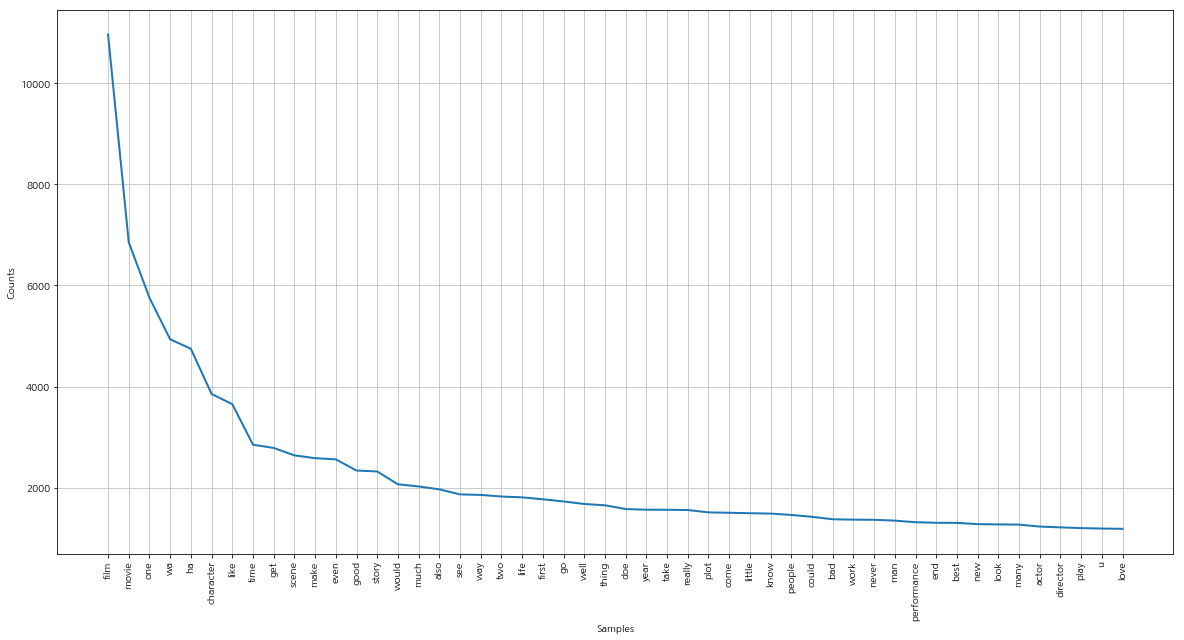

In [18]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'c:/windows/fonts/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

# Term document matrix 만들기


In [19]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

### train 데이터와 test 데이터 나누기

In [60]:
train_docs = whole_data.reviews.values.tolist()[:len(train_data)]
test_docs = whole_data.reviews.values.tolist()[-len(test_data):]

### train_docs 의 토큰을 결합

In [61]:
train_docs = [' '.join(doc) for doc in train_docs]

In [62]:
train_docs[0]

'film adapted comic book plenty success whether superheroes batman superman spawn geared toward kid casper arthouse crowd ghost world never really comic book like hell starter wa created alan moore eddie campbell brought medium whole new level mid 80 12part series called watchman say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel 500 page long includes nearly 30 consist nothing footnote word dismiss film source get past whole comic book thing might find another stumbling block hell director albert allen hughes getting hughes brother direct seems almost ludicrous casting carrot top well anything riddle better direct film set ghetto feature really violent street crime mad genius behind menace ii society ghetto question course whitechapel 1888 london east end filthy sooty place whore called unfortunate starting get little nervous mysterious psychopath ha carving profession surgical precision first stif

### test_docs 의 토큰을 결합

In [77]:
test_docs = [' '.join(doc) for doc in test_docs]

In [78]:
test_docs[0]

'1912 ship set sail maiden voyage across atlantic america ship wa built largest ship world wa wa also build one luxurious wa finally wa built unsinkable unfortunately wa get ticket voyage either spent life saving get america start life anew part upper class money spare finally lucky enough full house poker match dock like jack dawson jack dawson make trip happens right place right time rose dewitt bukater first class passenger climb railing aft ship thought jumping thus started tale romance intrigue tale death tragedy movie tragic event took place great many year ago even taken lightly bit historical trivia movie titanic show happened maybe 100 degree accuracy still show realisticaly titanic story backdrop story serf admirably brining forth interesting story although simple simple premise captivating movie emotional simply alone enough story brought certain style make much emotional much effective movie forgotten quickly unfortunately something produced hollywood great frequency attent

### train_x 에 대한 term document matrix 생성

In [74]:
train_x = vectorizer.fit_transform(train_docs)

### test_x matrix 생성

In [79]:
test_x = vectorizer.transform(test_docs)

### train_y와 test_y 생성

In [80]:
train_y = whole_data.sentiment.values.tolist()[:len(train_data)]
test_y = whole_data.sentiment.values.tolist()[-len(test_data):]

# 분류 모델 생성 및 분류 성능 구하기

### SVM rbf 모델 생성 및 예측 

In [81]:
classifier_rbf = svm.SVC()
classifier_rbf.fit(train_x, train_y)
prediction_rbf = classifier_rbf.predict(test_x)

### 정확도 계산 (accuracy score)

In [85]:
print(accuracy_score(test_y, prediction_rbf))

0.85


### SVM linear 모델 생성 및 예측

In [86]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_x, train_y)
prediction_linear = classifier_linear.predict(test_x)

### 정확도 계산 (accuracy score)

In [90]:
print(accuracy_score(test_y, prediction_linear))

0.905


### Random Forest 모델 생성 및 예측

In [93]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
predict_rf = rf.predict(test_x)

C:\Users\Yooyeon\Anaconda35\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 정확도 계산 (accuracy score)

In [94]:
print(accuracy_score(test_y, predict_rf))

0.72


### Gradient Boosting 분류 모델 생성 및 예측

In [95]:
gb = GradientBoostingClassifier()
gb.fit(train_x, train_y)
predict_gb = gb.predict(test_x)

### 정확도 계산 (accuracy score)

In [96]:
print(accuracy_score(test_y, predict_gb))

0.8


# Doc2vec

In [3]:
model= Doc2Vec.load("d2v.model1")

# 1번 문서와 가장 유사한 문서 찾기

In [4]:
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

[('1483', 0.8477433919906616), ('158', 0.8189879655838013), ('1218', 0.8129209280014038), ('376', 0.8073064684867859), ('1689', 0.8008226156234741), ('1732', 0.7990276217460632), ('934', 0.7905800938606262), ('973', 0.789259135723114), ('1598', 0.7841190099716187), ('1291', 0.783103346824646)]


C:\Users\Yooyeon\Anaconda35\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# 1번 문서 찾기

In [5]:
print(model.docvecs['1'])

[-5.253556    3.336377   -2.1811903   2.641136   -0.08648554 -0.72707856
  6.8324194  -0.30450943 -2.4103618  -3.8622897   3.2339597   4.1924057
 -2.4823973   0.1420682  -5.660871    4.143063   -1.4476397   0.16620678
 -4.2532864  -3.067169  ]
